In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
num_words = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=num_words)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension)) # 정수 시퀀스를 0과 1로 이루어진 벡터로 전환
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0 # ex) [3, 5] 인덱스 3과 5만 1이고 나머지를 모두 0인 10000차원 벡터로 변환함
  return results

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
train_data = multi_hot_sequences(train_data, dimension = num_words)
test_data = multi_hot_sequences(test_data, dimension=num_words)

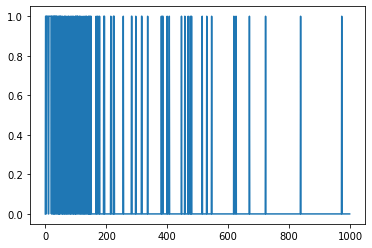

In [5]:
plt.plot(train_data[0])

## 과대적합

In [6]:
baseline_model = keras.Sequential([
                                   keras.layers.Dense(16, activation = 'relu', input_shape = (num_words,)),
                                   keras.layers.Dense(16, activation = 'relu'),
                                   keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6081 - accuracy: 0.6964 - binary_crossentropy: 0.6081 - val_loss: 0.4755 - val_accuracy: 0.8062 - val_binary_crossentropy: 0.4755
Epoch 2/20
49/49 - 0s - loss: 0.3922 - accuracy: 0.8388 - binary_crossentropy: 0.3922 - val_loss: 0.3539 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.3539
Epoch 3/20
49/49 - 0s - loss: 0.3279 - accuracy: 0.8653 - binary_crossentropy: 0.3279 - val_loss: 0.3350 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3350
Epoch 4/20
49/49 - 0s - loss: 0.3113 - accuracy: 0.8723 - binary_crossentropy: 0.3113 - val_loss: 0.3319 - val_accuracy: 0.8579 - val_binary_crossentropy: 0.3319
Epoch 5/20
49/49 - 0s - loss: 0.3054 - accuracy: 0.8740 - binary_crossentropy: 0.3054 - val_loss: 0.3304 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3304
Epoch 6/20
49/49 - 0s - loss: 0.3008 - accuracy: 0.8767 - binary_crossentropy: 0.3008 - val_loss: 0.3323 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3323
Epoch 7/20
49/49 - 0s - loss

In [8]:
smaller_model = keras.Sequential([
                                  keras.layers.Dense(4, activation = 'relu', input_shape = (num_words,)),
                                  keras.layers.Dense(4, activation = 'relu'),
                                  keras.layers.Dense(1, activation = 'sigmoid')
])

smaller_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs = 20,
                                    batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6671 - accuracy: 0.6200 - binary_crossentropy: 0.6671 - val_loss: 0.6155 - val_accuracy: 0.7477 - val_binary_crossentropy: 0.6155
Epoch 2/20
49/49 - 0s - loss: 0.5651 - accuracy: 0.7903 - binary_crossentropy: 0.5651 - val_loss: 0.5287 - val_accuracy: 0.8111 - val_binary_crossentropy: 0.5287
Epoch 3/20
49/49 - 0s - loss: 0.5064 - accuracy: 0.8326 - binary_crossentropy: 0.5064 - val_loss: 0.4962 - val_accuracy: 0.8246 - val_binary_crossentropy: 0.4962
Epoch 4/20
49/49 - 0s - loss: 0.4778 - accuracy: 0.8528 - binary_crossentropy: 0.4778 - val_loss: 0.4756 - val_accuracy: 0.8511 - val_binary_crossentropy: 0.4756
Epoch 5/20
49/49 - 0s - loss: 0.4594 - accuracy: 0.8624 - binary_crossentropy: 0.4594 - val_loss: 0.4616 - val_accuracy: 0.8514 - val_binary_crossentropy: 0.4616
Epoch 6/20
49/49 - 0s - loss: 0.4451 - accuracy: 0.8693 - binary_crossentropy: 0.4451 - val_loss: 0.4518 - val_accuracy: 0.8585 - val_binary_crossentropy: 0.4518
Epoch 7/20
49/49 - 0s - loss

In [10]:
bigger_model = keras.models.Sequential([
                                        keras.layers.Dense(512, activation = 'relu', input_shape = (num_words,)),
                                        keras.layers.Dense(512, activation = 'relu'),
                                        keras.layers.Dense(1, activation = 'sigmoid')
])

bigger_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data , train_labels, epochs = 20,
                                  batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 3s - loss: 0.4283 - accuracy: 0.8004 - binary_crossentropy: 0.4283 - val_loss: 0.3364 - val_accuracy: 0.8569 - val_binary_crossentropy: 0.3364
Epoch 2/20
49/49 - 3s - loss: 0.2903 - accuracy: 0.8800 - binary_crossentropy: 0.2903 - val_loss: 0.3303 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3303
Epoch 3/20
49/49 - 3s - loss: 0.2293 - accuracy: 0.9076 - binary_crossentropy: 0.2293 - val_loss: 0.3374 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3374
Epoch 4/20
49/49 - 3s - loss: 0.1121 - accuracy: 0.9668 - binary_crossentropy: 0.1121 - val_loss: 0.4166 - val_accuracy: 0.8491 - val_binary_crossentropy: 0.4166
Epoch 5/20
49/49 - 3s - loss: 0.0250 - accuracy: 0.9959 - binary_crossentropy: 0.0250 - val_loss: 0.5437 - val_accuracy: 0.8483 - val_binary_crossentropy: 0.5437
Epoch 6/20
49/49 - 3s - loss: 0.0053 - accuracy: 0.9996 - binary_crossentropy: 0.0053 - val_loss: 0.6138 - val_accuracy: 0.8510 - val_binary_crossentropy: 0.6138
Epoch 7/20
49/49 - 3s - loss

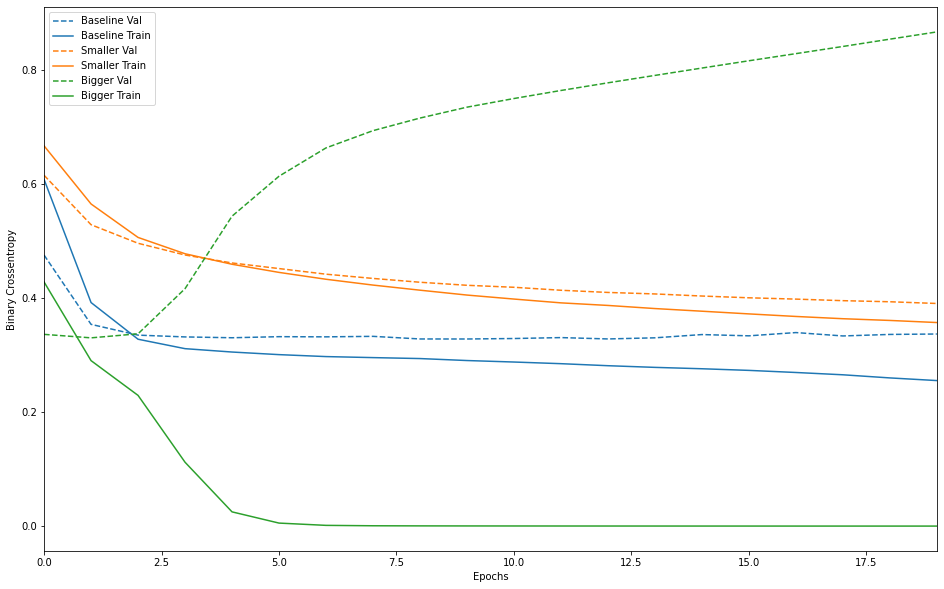

In [18]:
def plot_history(histories, key = 'binary_crossentropy'):
  plt.figure(figsize = (16, 10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history), ('smaller', smaller_history), ('bigger', bigger_history)])

# 큰 네트워크는 거의 첫 번째 에포크 이후에 과대적합이 시작
# 네트워크의 용량이 많을수록 훈련 세트를 더 빠르게 모델링(훈련 손실이 낮아짐) -> 더 쉽게 과적합됨

overfit을 완화시키는 일반적인 방법 : 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것 ->> 가중치 값의 분포를 좀 더 균일하게 만들어 줌 '가중치 규제'

L1 : 가중치의 절댓값에 비례하는 비용이 추가됨 (가중치의 'L1 norm' 추가)
L2 : 가중체의 제곱에 비례하는 비용이 추가됨 (가중치의 'L2 norm'^2 추가)

In [24]:
l2_model = keras.models.Sequential([
                                  keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001), activation = 'relu', input_shape = (num_words,)),
                                  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation = 'relu'),
                                  keras.layers.Dense(1, activation = 'sigmoid')
])

l2_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6080 - accuracy: 0.7234 - binary_crossentropy: 0.5647 - val_loss: 0.4639 - val_accuracy: 0.8228 - val_binary_crossentropy: 0.4224
Epoch 2/20
49/49 - 0s - loss: 0.4072 - accuracy: 0.8486 - binary_crossentropy: 0.3656 - val_loss: 0.3847 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3434
Epoch 3/20
49/49 - 0s - loss: 0.3628 - accuracy: 0.8660 - binary_crossentropy: 0.3220 - val_loss: 0.3695 - val_accuracy: 0.8611 - val_binary_crossentropy: 0.3295
Epoch 4/20
49/49 - 0s - loss: 0.3501 - accuracy: 0.8717 - binary_crossentropy: 0.3110 - val_loss: 0.3716 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3333
Epoch 5/20
49/49 - 0s - loss: 0.3437 - accuracy: 0.8737 - binary_crossentropy: 0.3063 - val_loss: 0.3640 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3275
Epoch 6/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8745 - binary_crossentropy: 0.3033 - val_loss: 0.3690 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3340
Epoch 7/20
49/49 - 0s - loss

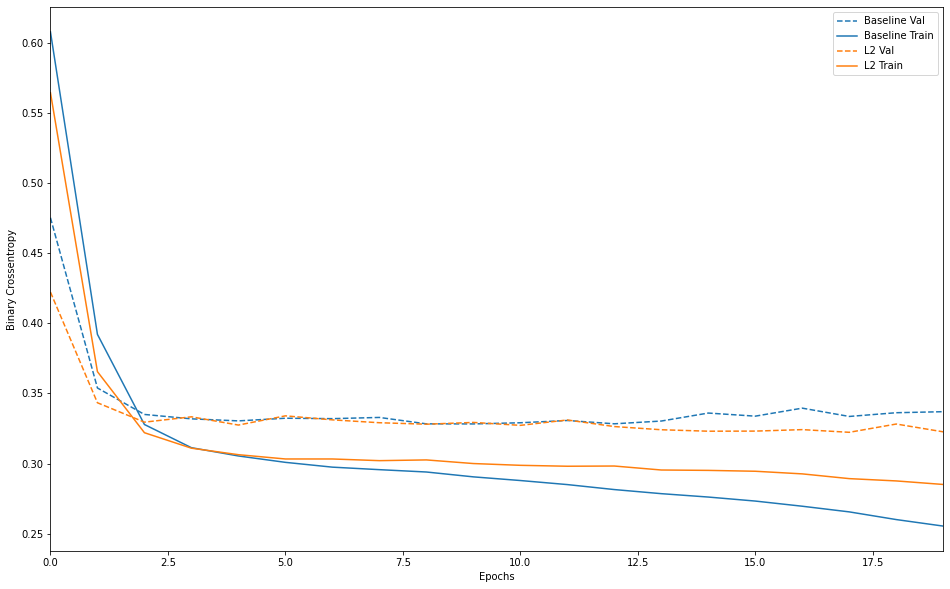

In [25]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [26]:
dpt_model = keras.models.Sequential([
                                     keras.layers.Dense(16, activation = 'relu', input_shape = (num_words,)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(16, activation = 'relu'),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Dense(1, activation = 'sigmoid')
])

dpt_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6914 - accuracy: 0.5256 - binary_crossentropy: 0.6914 - val_loss: 0.6565 - val_accuracy: 0.6695 - val_binary_crossentropy: 0.6565
Epoch 2/20
49/49 - 0s - loss: 0.6132 - accuracy: 0.6565 - binary_crossentropy: 0.6132 - val_loss: 0.5012 - val_accuracy: 0.8165 - val_binary_crossentropy: 0.5012
Epoch 3/20
49/49 - 0s - loss: 0.5099 - accuracy: 0.7656 - binary_crossentropy: 0.5099 - val_loss: 0.4025 - val_accuracy: 0.8419 - val_binary_crossentropy: 0.4025
Epoch 4/20
49/49 - 0s - loss: 0.4548 - accuracy: 0.8106 - binary_crossentropy: 0.4548 - val_loss: 0.3690 - val_accuracy: 0.8485 - val_binary_crossentropy: 0.3690
Epoch 5/20
49/49 - 0s - loss: 0.4223 - accuracy: 0.8251 - binary_crossentropy: 0.4223 - val_loss: 0.3469 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3469
Epoch 6/20
49/49 - 0s - loss: 0.4046 - accuracy: 0.8372 - binary_crossentropy: 0.4046 - val_loss: 0.3398 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3398
Epoch 7/20
49/49 - 0s - loss

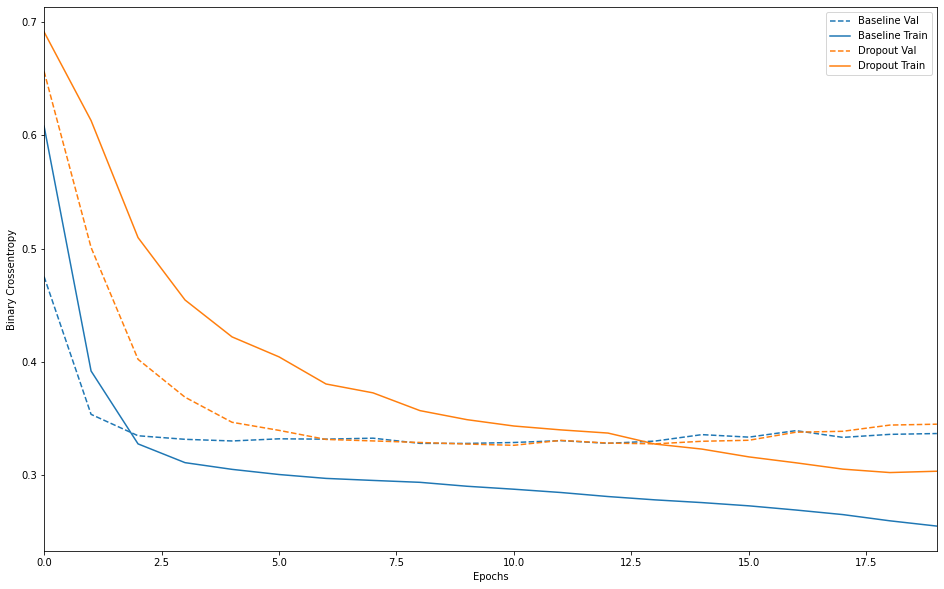

In [27]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])